# ***Explore & Analysis Data***

In [ ]:
#Importing Libraries

import numpy as np
import pandas as pd

#For Visualization
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

#Splitting the dataset into Training set and Test set
from sklearn.model_selection import train_test_split

#Feature Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# Feature engineering
from sklearn.feature_selection import mutual_info_regression

#For Fitting
from sklearn.metrics import accuracy_score

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("/content/assignment1dataset.csv")

## *`Explore Data`*

In [ ]:
df.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,9,1,91
1,4,82,4,2,65
2,8,51,7,2,45
3,5,52,5,2,36
4,7,75,8,5,66


In [ ]:
df.tail()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
9995,1,49,4,2,23
9996,7,64,8,5,58
9997,6,83,8,5,74
9998,9,97,7,0,95
9999,7,74,8,1,64


In [ ]:
df.shape

(10000, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Hours Studied                     10000 non-null  int64
 1   Previous Scores                   10000 non-null  int64
 2   Sleep Hours                       10000 non-null  int64
 3   Sample Question Papers Practiced  10000 non-null  int64
 4   Performance Index                 10000 non-null  int64
dtypes: int64(5)
memory usage: 390.8 KB


In [ ]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


## *`Analyze Data`*

In [ ]:
df.duplicated().sum()

234

In [ ]:
df=df.drop_duplicates() #drop duplicates

***Data doesn't have Nulls & we drop deuplicates ,So data is cleaning now.***

## *`Visualize Data`*

<Axes: xlabel='Sample Question Papers Practiced', ylabel='Density'>

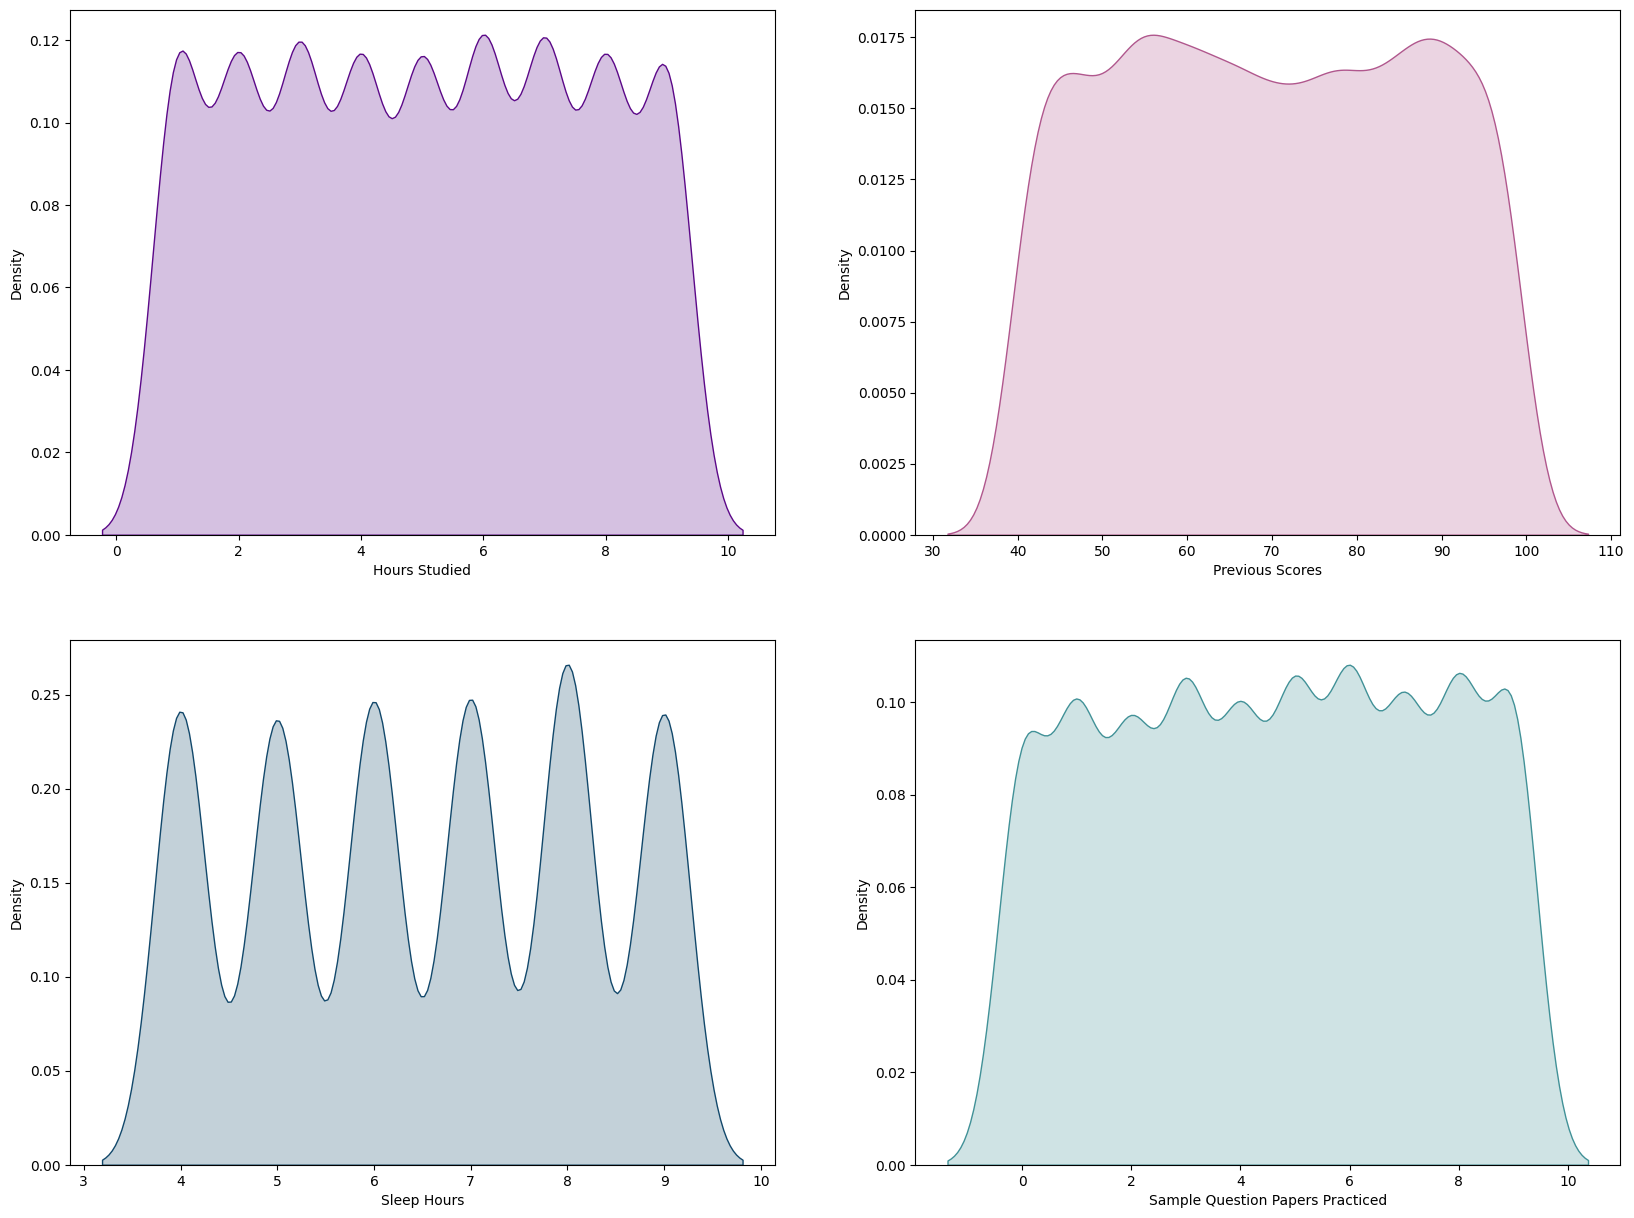

In [ ]:
##histogram
plt.figure(figsize=(20,15))
plt.subplot(2, 2, 1)
sns.kdeplot(df['Hours Studied'], shade=True, color="#5B0888")
plt.subplot(2, 2, 2)
sns.kdeplot(df['Previous Scores'], shade=True, color="#B0578D")
plt.subplot(2, 2, 3)
sns.kdeplot(df['Sleep Hours'], shade=True, color="#12486B")
plt.subplot(2, 2, 4)
sns.kdeplot(df['Sample Question Papers Practiced'], shade=True, color="#419197")

<Axes: >

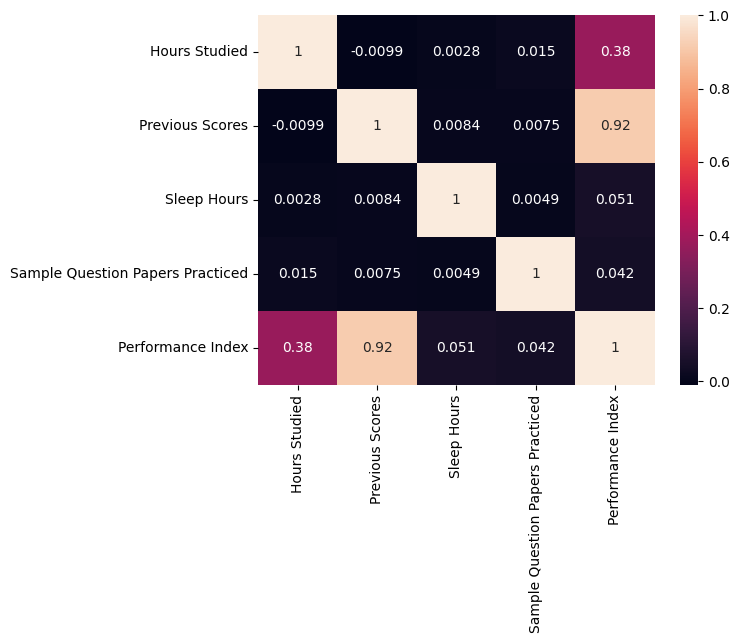

In [ ]:
# Heatmap
sns.heatmap(df.corr(), annot=True)

# ***Feature Extraction***

In [ ]:
df['Wasted_hours']=24-(df['Sleep Hours']+df['Hours Studied'])

#***Features Scaling***

In [ ]:
#scaling data in range of 0 to 1
scaler = MinMaxScaler()

In [ ]:
data=df.copy()

In [ ]:
columns_to_scale = ['Hours Studied', 'Previous Scores', 'Sleep Hours','Sample Question Papers Practiced', 'Performance Index','Wasted_hours']
# Fit and transform the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

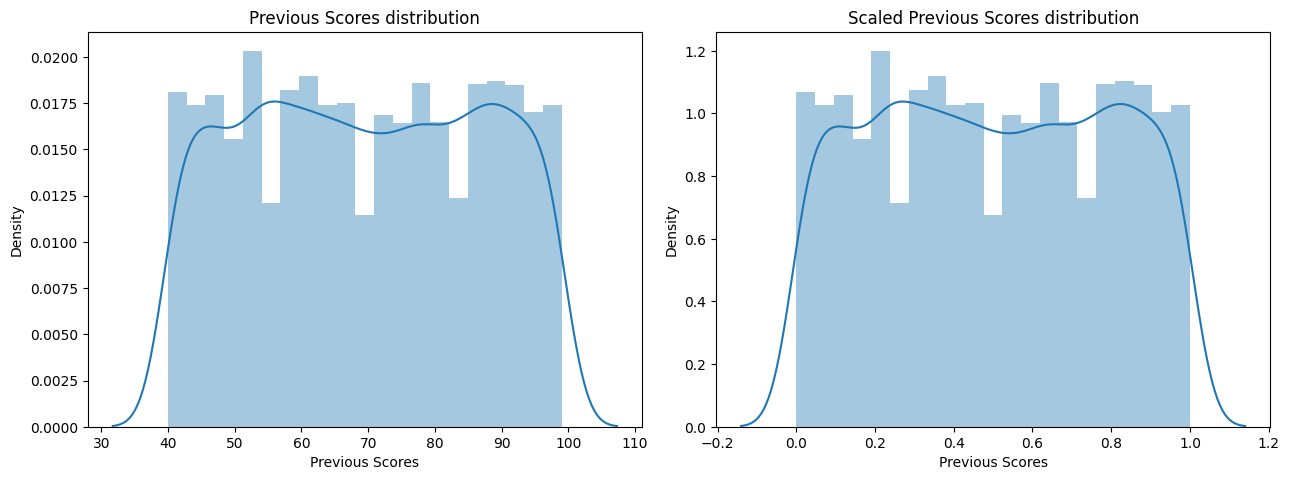

In [ ]:
plt.figure(figsize=(13, 9))

# First subplot
plt.subplot(2, 2, 1)
sns.distplot(data['Previous Scores'])
plt.title('Previous Scores distribution')

# Second subplot
plt.subplot(2, 2, 2)
sns.distplot(df['Previous Scores'])
plt.title('Scaled Previous Scores distribution')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the entire figure with all subplots
plt.show()

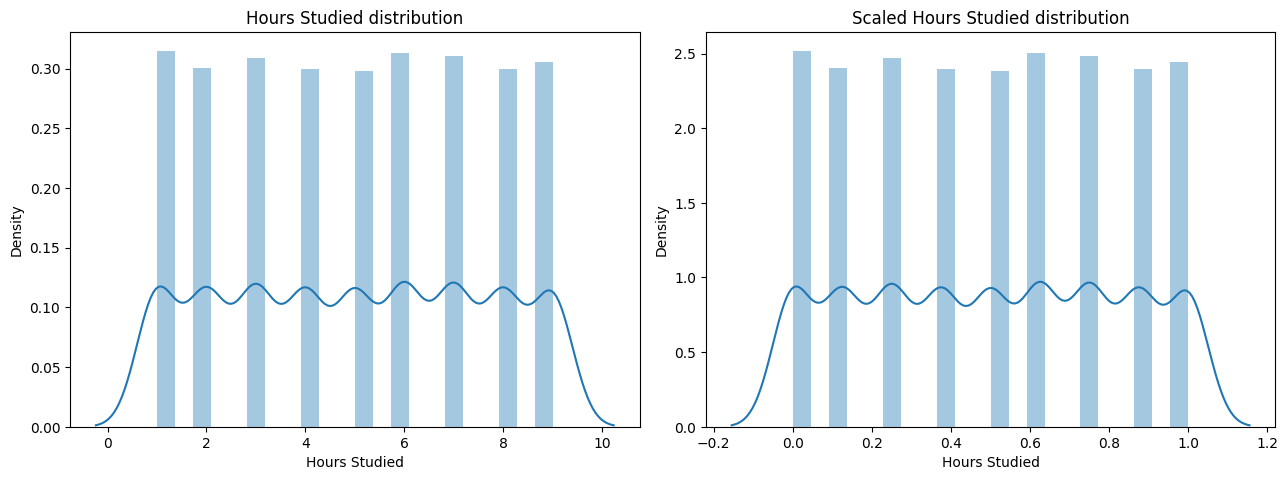

In [ ]:
plt.figure(figsize=(13, 9))

# First subplot
plt.subplot(2, 2, 1)
sns.distplot(data['Hours Studied'])
plt.title('Hours Studied distribution')

# Second subplot
plt.subplot(2, 2, 2)
sns.distplot(df['Hours Studied'])
plt.title('Scaled Hours Studied distribution')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the entire figure with all subplots
plt.show()

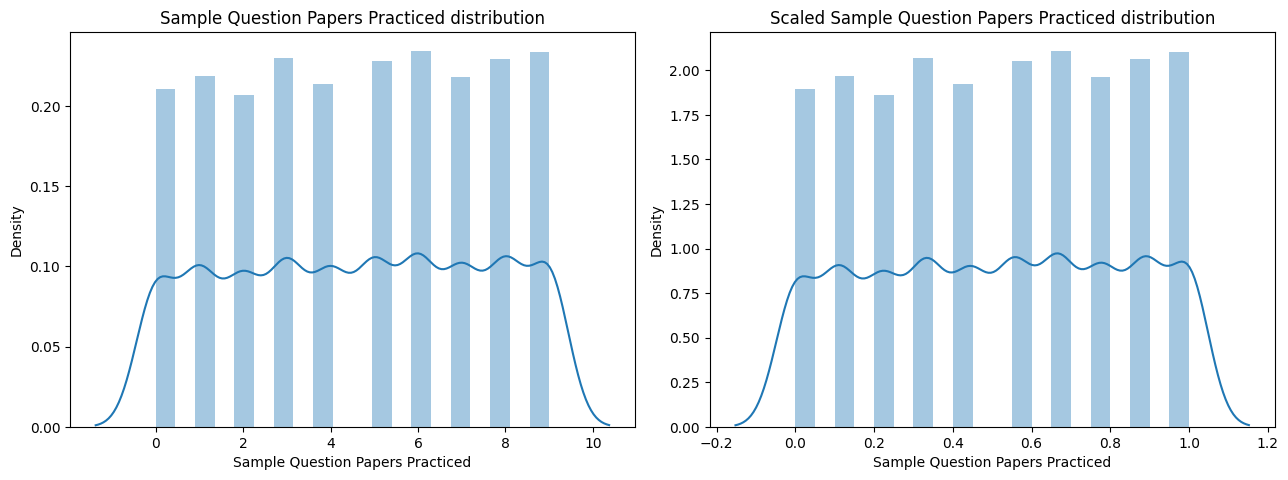

In [ ]:
plt.figure(figsize=(13, 9))

# First subplot
plt.subplot(2, 2, 1)
sns.distplot(data['Sample Question Papers Practiced'])
plt.title('Sample Question Papers Practiced distribution')

# Second subplot
plt.subplot(2, 2, 2)
sns.distplot(df['Sample Question Papers Practiced'])
plt.title('Scaled Sample Question Papers Practiced distribution')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the entire figure with all subplots
plt.show()

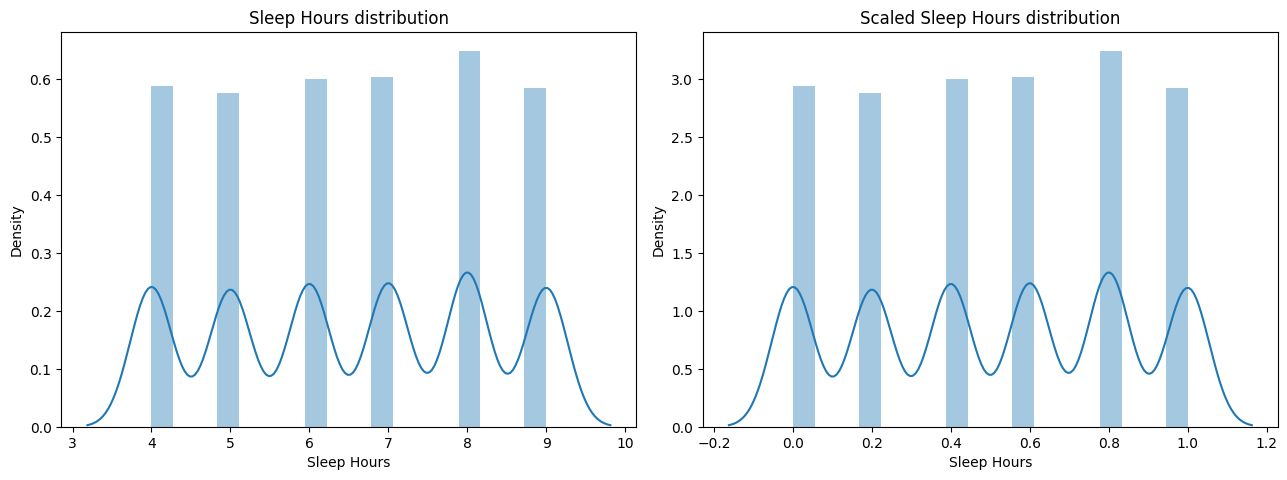

In [ ]:
plt.figure(figsize=(13, 9))

# First subplot
plt.subplot(2, 2, 1)
sns.distplot(data['Sleep Hours'])
plt.title('Sleep Hours distribution')

# Second subplot
plt.subplot(2, 2, 2)
sns.distplot(df['Sleep Hours'])
plt.title('Scaled Sleep Hours distribution')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the entire figure with all subplots
plt.show()


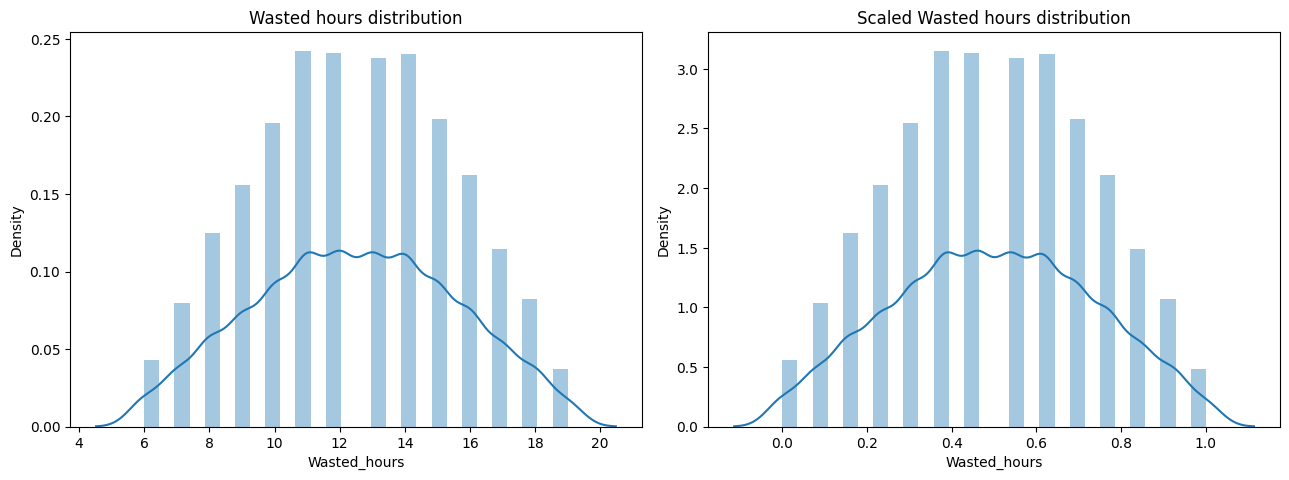

In [ ]:
plt.figure(figsize=(13, 9))

# First subplot
plt.subplot(2, 2, 1)
sns.distplot(data['Wasted_hours'])
plt.title('Wasted hours distribution')

# Second subplot
plt.subplot(2, 2, 2)
sns.distplot(df['Wasted_hours'])
plt.title('Scaled Wasted hours distribution')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the entire figure with all subplots
plt.show()

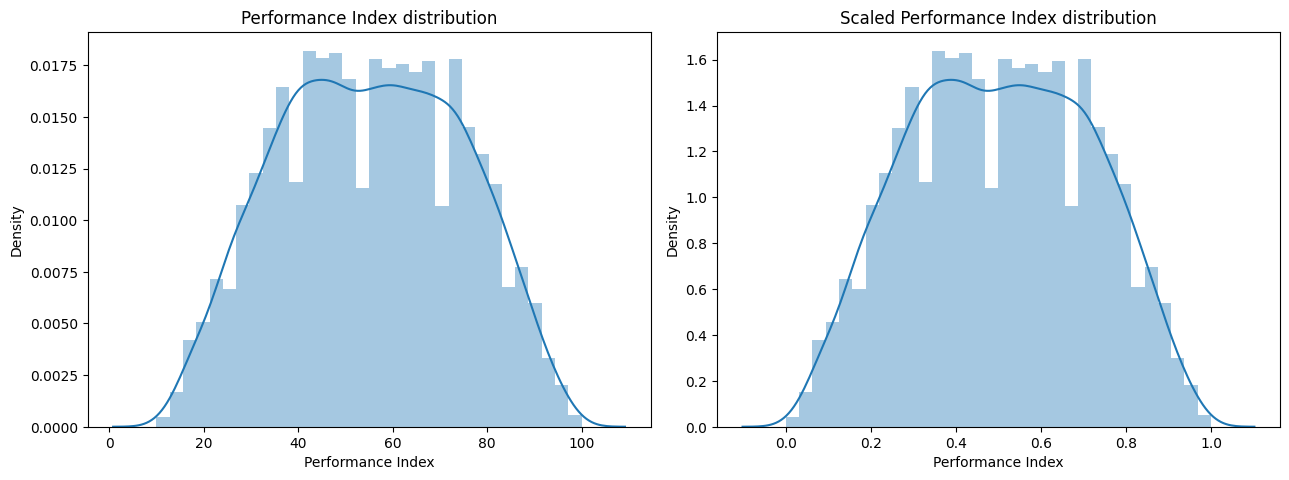

In [ ]:
plt.figure(figsize=(13, 9))

# First subplot
plt.subplot(2, 2, 1)
sns.distplot(data['Performance Index'])
plt.title('Performance Index distribution')

# Second subplot
plt.subplot(2, 2, 2)
sns.distplot(df['Performance Index'])
plt.title('Scaled Performance Index distribution')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the entire figure with all subplots
plt.show()

# ***Implement Linear Regression Algorithm from scratch***

## ***`Split Data into Features and target`***

In [ ]:
X1 = df['Hours Studied']
X2 = df['Previous Scores']
X3 = df['Sleep Hours']
X4= df['Sample Question Papers Practiced']
X5=df['Wasted_hours']
Y = df['Performance Index']

## ***`Reshaping Data into Numpy Array`***

In [ ]:
X1 = X1.to_numpy().reshape(X1.shape[0], -1)
X2 = X2.to_numpy().reshape(X2.shape[0], -1)
X3 = X3.to_numpy().reshape(X3.shape[0], -1)
X4 = X4.to_numpy().reshape(X4.shape[0], -1)
X5 = X5.to_numpy().reshape(X5.shape[0], -1)
Y = Y.to_numpy().reshape(Y.shape[0], -1)

print("X1 Shape: ",X1.shape)
print("X2 Shape: ",X2.shape)
print("X3 Shape: ",X3.shape)
print("X4 Shape: ",X4.shape)
print("X5 Shape: ",X5.shape)
print("Y shape: ",Y.shape)

X1 Shape:  (9766, 1)
X2 Shape:  (9766, 1)
X3 Shape:  (9766, 1)
X4 Shape:  (9766, 1)
X5 Shape:  (9766, 1)
Y shape:  (9766, 1)


## ***Distribution of each*** `feature` with `target` ***column before fitting regression line***

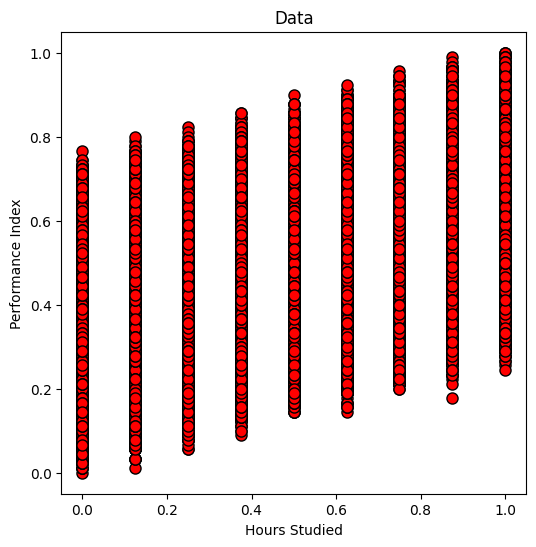

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(X1, Y, 'ro', ms=8, mec='k')
plt.title("Data")
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.grid(False)

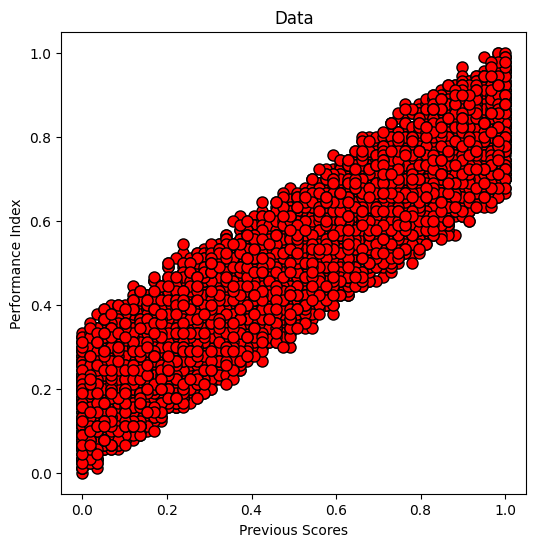

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(X2, Y, 'ro', ms=8, mec='k')
plt.title("Data")
plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')
plt.grid(False)

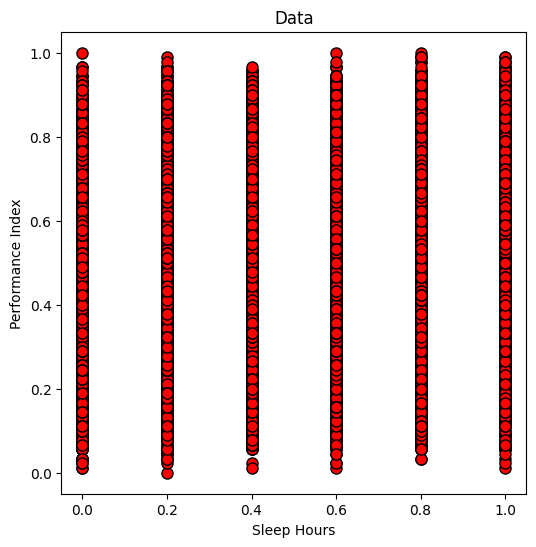

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(X3, Y, 'ro', ms=8, mec='k')
plt.title("Data")
plt.xlabel('Sleep Hours')
plt.ylabel('Performance Index')
plt.grid(False)

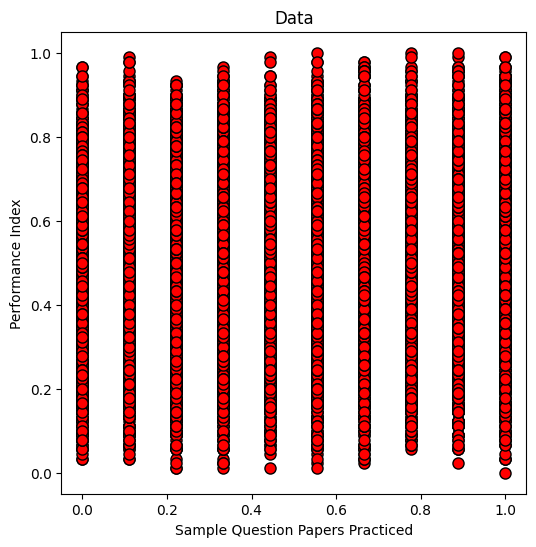

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(X4, Y, 'ro', ms=8, mec='k')
plt.title("Data")
plt.xlabel('Sample Question Papers Practiced')
plt.ylabel('Performance Index')
plt.grid(False)

# ***Algorithm Building***

* ***Function:*** simple_linear_regression(X, y, learning_rate=0.01, epochs=1000)

* ***Description:***
    This function performs simple linear regression to model the relationship
    between an independent variable (X) and a dependent variable (y) using
    gradient descent for optimization. It iteratively updates the slope (m)
    and intercept (b) of the linear equation to minimize the mean squared error,
    which serves as the loss function.

* ***Parameters:***
    - X: Independent variable (numpy array)
    - y: Dependent variable (numpy array)
    - learning_rate: Learning rate for gradient descent (default is 0.01)
    - epochs: Number of iterations for gradient descent (default is 1000)

* ***Returns:***
    - m: Slope of the regression line
    - b: Intercept of the regression line



In [ ]:
def simple_linear_regression(X, y, learning_rate=0.01, epochs=1000):

    # Initialize parameters
    m, b = 0, 0
    n = len(X)
    global loss_list
    global y_pred
    loss_list=[]

    # Gradient Descent
    for epoch in range(epochs):
        y_pred = m * X + b
        error = (1/n) * sum((y_pred - y)**2)
        loss_list.append(error)

        # Partial derivatives with respect to m and b
        dm = (2/n) * sum(X * (y_pred - y))
        db = (2/n) * sum(y_pred - y)

        # Update parameters
        m = m - learning_rate * dm
        b = b - learning_rate * db

        # Print progress
        if epoch % 100 == 0:
            print(f'Epoch {epoch}/{epochs}, Error: {error}')

    return m, b

In [ ]:
def plot_regression_line(X, y, m, b):
    plt.scatter(X, y, color='blue', label='Data points')
    plt.plot(X, m*X + b, color='red', label='Regression line')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Simple Linear Regression')
    plt.legend()
    plt.show()

## ***`Previous Scores Feture`***

In [ ]:
# Train the model
m, b = simple_linear_regression(X2, Y, learning_rate=0.05, epochs=1000)

Epoch 0/1000, Error: [0.29826455]
Epoch 100/1000, Error: [0.01183942]
Epoch 200/1000, Error: [0.00852777]
Epoch 300/1000, Error: [0.00768318]
Epoch 400/1000, Error: [0.00746778]
Epoch 500/1000, Error: [0.00741285]
Epoch 600/1000, Error: [0.00739884]
Epoch 700/1000, Error: [0.00739526]
Epoch 800/1000, Error: [0.00739435]
Epoch 900/1000, Error: [0.00739412]


In [ ]:
Previous_Scores_loss=loss_list[-1]
score1 = r2_score(Y, y_pred)
print("R2 score:", score1)

R2 score: 0.8378567574145859


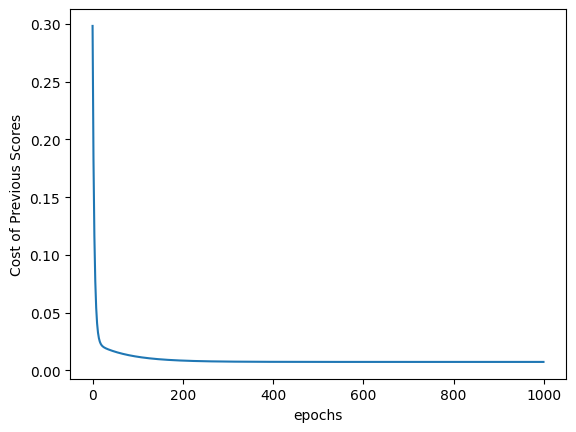

In [ ]:
plt.plot(loss_list)
plt.xlabel('epochs')
plt.ylabel('Cost of Previous Scores')
plt.show()

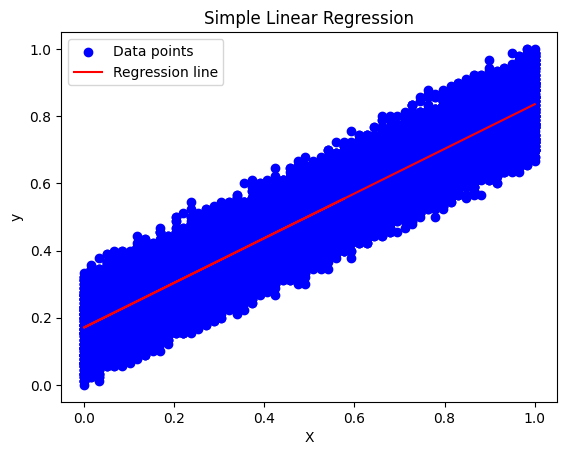

In [ ]:
# Plot the regression line
plot_regression_line(X2,Y, m, b)

## ***`Hours Studied Feature`***

In [ ]:
# Train the model
m, b = simple_linear_regression(X1, Y, learning_rate=0.01, epochs=1000)

Epoch 0/1000, Error: [0.29826455]
Epoch 100/1000, Error: [0.04075413]
Epoch 200/1000, Error: [0.03924]
Epoch 300/1000, Error: [0.03921521]
Epoch 400/1000, Error: [0.03920355]
Epoch 500/1000, Error: [0.03919519]
Epoch 600/1000, Error: [0.03918918]
Epoch 700/1000, Error: [0.03918486]
Epoch 800/1000, Error: [0.03918175]
Epoch 900/1000, Error: [0.03917952]


In [ ]:
Hours_Studied_loss=loss_list[-1]
score2 = r2_score(Y, y_pred)
print("R2 score:", score2)

R2 score: 0.14087329838676932


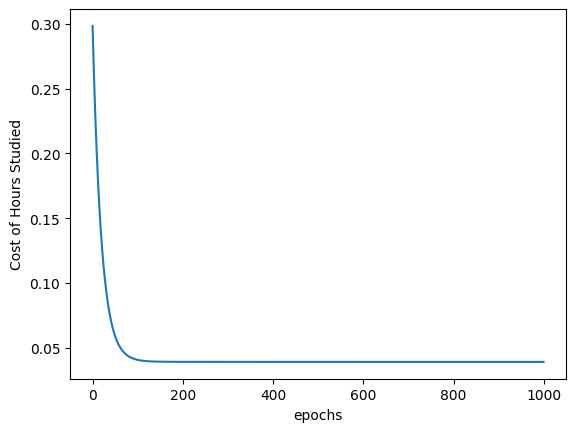

In [ ]:
plt.plot(loss_list)
plt.xlabel('epochs')
plt.ylabel('Cost of Hours Studied')
plt.show()

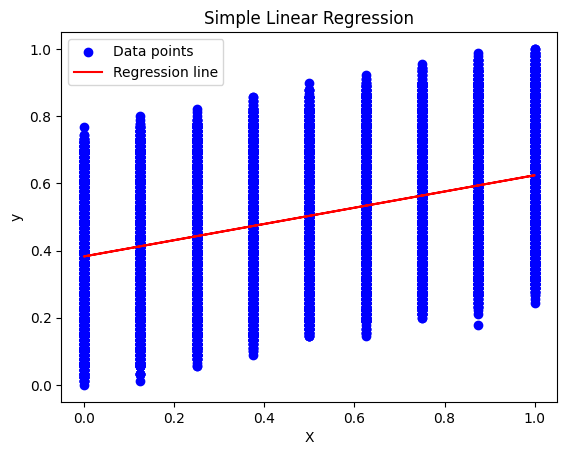

In [ ]:
# Plot the regression line
plot_regression_line(X1,Y, m, b)

## ***`Sleep Hours Feature`***

In [ ]:
# Train the model
m, b = simple_linear_regression(X3, Y, learning_rate=0.01, epochs=1000)

Epoch 0/1000, Error: [0.29826455]
Epoch 100/1000, Error: [0.04959172]
Epoch 200/1000, Error: [0.04738941]
Epoch 300/1000, Error: [0.04680721]
Epoch 400/1000, Error: [0.04640652]
Epoch 500/1000, Error: [0.04612713]
Epoch 600/1000, Error: [0.0459323]
Epoch 700/1000, Error: [0.04579644]
Epoch 800/1000, Error: [0.04570169]
Epoch 900/1000, Error: [0.04563562]


In [ ]:
Sleep_Hours_loss=loss_list[-1]
score3 = r2_score(Y, y_pred)
print("R2 score:", score3)

R2 score: 0.00026521611676411094


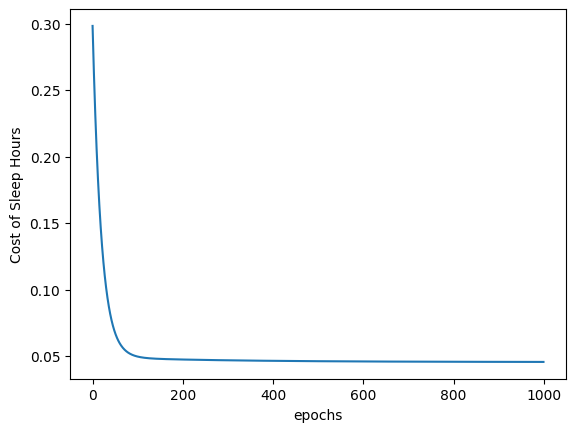

In [ ]:
plt.plot(loss_list)
plt.xlabel('epochs')
plt.ylabel('Cost of Sleep Hours')
plt.show()

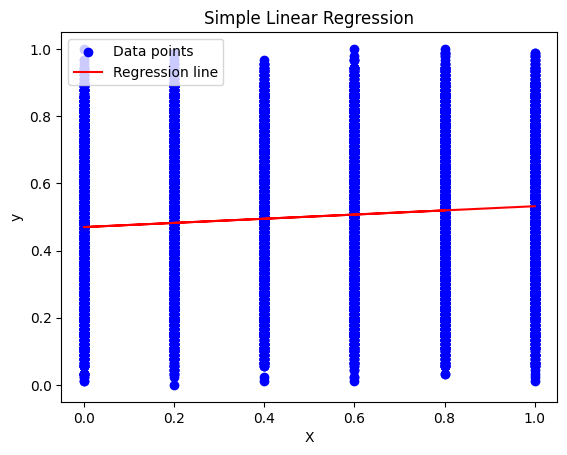

In [ ]:
# Plot the regression line
plot_regression_line(X3,Y, m, b)

## ***`Sample Question Papers Practiced Feature`***

In [ ]:
# Train the model
m, b = simple_linear_regression(X4, Y, learning_rate=0.01, epochs=1000)

Epoch 0/1000, Error: [0.29826455]
Epoch 100/1000, Error: [0.04949512]
Epoch 200/1000, Error: [0.04741522]
Epoch 300/1000, Error: [0.04689529]
Epoch 400/1000, Error: [0.04652218]
Epoch 500/1000, Error: [0.04625049]
Epoch 600/1000, Error: [0.04605263]
Epoch 700/1000, Error: [0.04590853]
Epoch 800/1000, Error: [0.0458036]
Epoch 900/1000, Error: [0.04572718]


In [ ]:
Sample_Question_Papers_Practiced_loss=loss_list[-1]
score4 = r2_score(Y, y_pred)
print("R2 score:", score4)

R2 score: -0.0015343429705185763


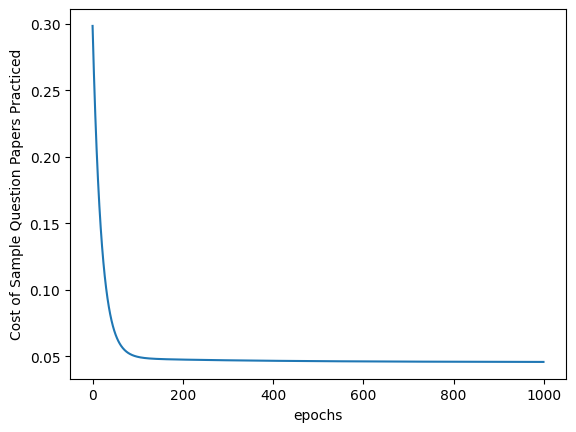

In [ ]:
plt.plot(loss_list)
plt.xlabel('epochs')
plt.ylabel('Cost of Sample Question Papers Practiced')
plt.show()

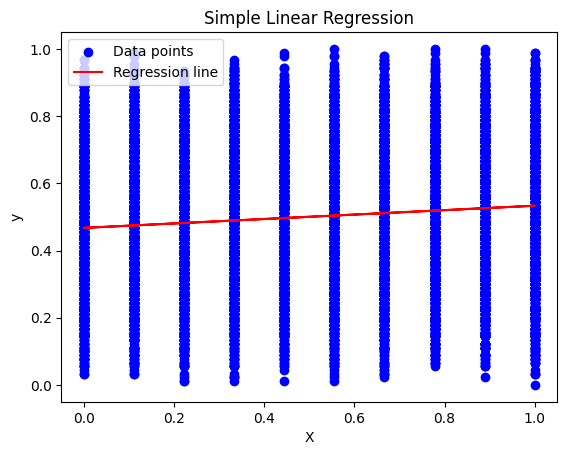

In [ ]:
# Plot the regression line
plot_regression_line(X4,Y, m, b)

## ***`Wasted Hours Feature`***

In [ ]:
# Train the model
m, b = simple_linear_regression(X5, Y, learning_rate=0.01, epochs=1000)

Epoch 0/1000, Error: [0.29826455]
Epoch 100/1000, Error: [0.05417692]
Epoch 200/1000, Error: [0.05066167]
Epoch 300/1000, Error: [0.04894118]
Epoch 400/1000, Error: [0.04751211]
Epoch 500/1000, Error: [0.04631902]
Epoch 600/1000, Error: [0.04532292]
Epoch 700/1000, Error: [0.04449128]
Epoch 800/1000, Error: [0.04379694]
Epoch 900/1000, Error: [0.04321724]


In [ ]:
Wasted_Hours_loss=loss_list[-1]
score5 = r2_score(Y, y_pred)
print("R2 score:", score5)

R2 score: 0.0628120895774279


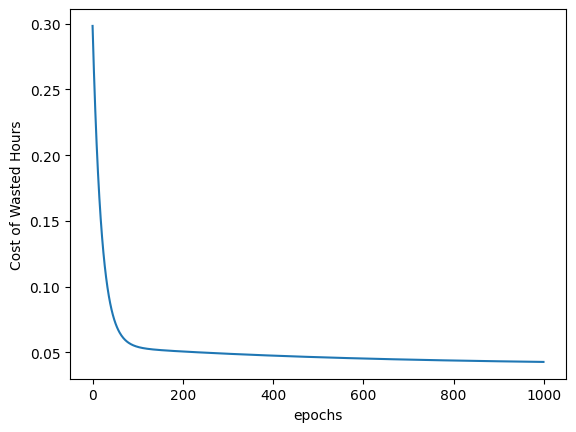

In [ ]:
plt.plot(loss_list)
plt.xlabel('epochs')
plt.ylabel('Cost of Wasted Hours')
plt.show()

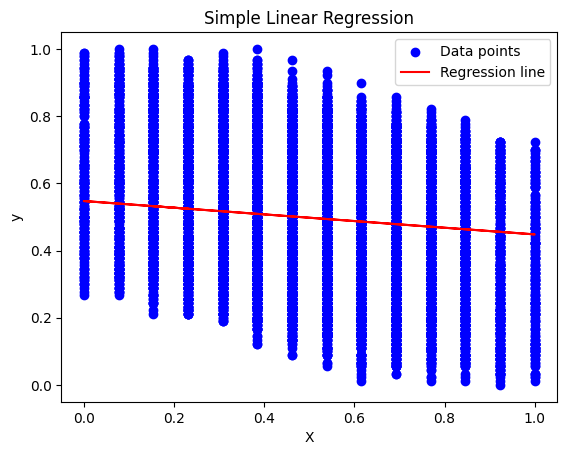

In [ ]:
# Plot the regression line
plot_regression_line(X5,Y, m, b)

# ***Conclusion***

In [ ]:
mylist={'feature number':['Previous Scores', 'Hours Studied','Sleep Hours','Sample Question Papers Practiced','Wasted Hours'],
       'cost':[Previous_Scores_loss,Hours_Studied_loss,Sleep_Hours_loss,Sample_Question_Papers_Practiced_loss,Wasted_Hours_loss],
       'r2_score':[score1,score2,score3,score4,score5]}
list_df=pd.DataFrame(mylist)
list_df

,feature number,cost,r2_score
0,Previous Scores,[0.007394060703879958],0.837857
1,Hours Studied,[0.03917791998458409],0.140873
2,Sleep Hours,[0.04558993370271926],0.000265
3,Sample Question Papers Practiced,[0.045671997246776765],-0.001534
4,Wasted Hours,[0.04273766942187823],0.062812


**SO , We can conclude that** *`Previous scores`* **is the best feature with 83.7857% with learning rate 0.5 and 1000 epochs**